# Churn Modelling

In [182]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=1000)

### Importing the Dataset

In [183]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [184]:
# Checking null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [185]:
# Getting Independent Variables
x= df.iloc[:,3:-1]
print(type(x))
print(x)

<class 'pandas.core.frame.DataFrame'>
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActive

In [186]:
# Independent variable
y= df.iloc[:,-1]
print(type(y))
print(y)

<class 'pandas.core.series.Series'>
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


### Class Distribution

Counter({0: 7963, 1: 2037})


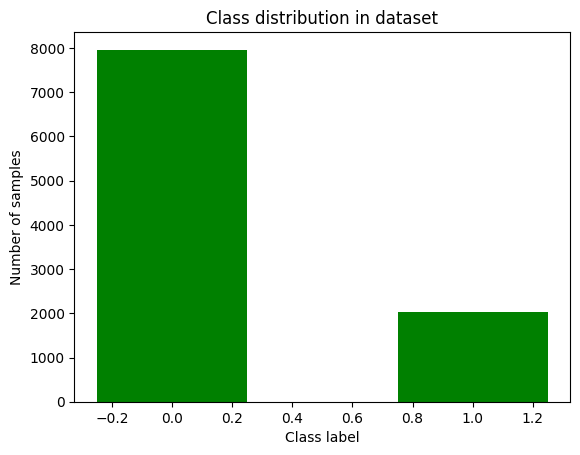

In [187]:
unique_labels, counts = np.unique(y, return_counts=True)
plt.bar (unique_labels , counts,width=0.5,color='green')
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
print(Counter(y))
plt.show()

## Encoding Categorical Data

In [188]:
# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

### Column Transformer

One Hot Encoding, Ordinal Encoding, Label Encoding 
Geography and Gender are categoriacal values  
Geography -> Label Encoder or Ordinal Encoder  
Gender    -> One Hot Encoder  
We can directy use Column transformer apply One Hot Encoder and Ordinal Encoder or we apply One Hot Encoder  and Label Encoder separtately

In [189]:
#for applying One Hot Encoder and Label Separtely
x2=x

In [190]:
ct = ColumnTransformer(transformers=[('Country',OneHotEncoder(),[1]),('Gender',OrdinalEncoder(),[2])],remainder='passthrough')
x= ct.fit_transform(x)
x

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [191]:
#using Label Encoder
le = LabelEncoder()
x2.iloc[:,2] = le.fit_transform(x2.iloc[:,2])
ct = ColumnTransformer(transformers=[('Country',OneHotEncoder(),[1])],remainder='passthrough')
x2= ct.fit_transform(x2)
x2

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)


OrdinalEncoder is for 2D data with the shape (n_samples, n_features)<br>
LabelEncoder is for 1D data with the shape (n_samples,)<br><br>

Oridnal Enoder - The features are converted to ordinal integers,single column of integers (0 to n_categories - 1) per feature.<br>
Label Encoder - Encode target labels with value between 0 and n_classes-1.

In [192]:
# Avoiding Dummy variable Trap
x=x[:,1:]

## Spliting The Datatset

In [193]:
from sklearn.model_selection import train_test_split

Spliting the dataset with equal label proportion into 3 sets:   
Training Set   ->  60%  
Validation Set ->  20%  
Test Set       ->  20%

In [194]:

X, x_test , Y, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)

### Proportion of class in Each Set

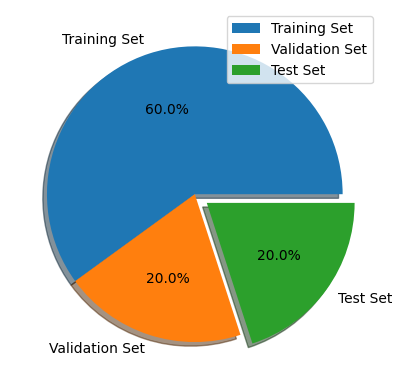

In [195]:
len_splits= [len(i) for i in [x_train,x_val,x_test]]
explode=[0,0,0.1]
plt.pie(len_splits,labels=['Training Set','Validation Set','Test Set'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.legend()
plt.show()

In [196]:
print("Ratio:")
print(f"Testing Set    : {Counter(y_test)[1]/len(y_test)}")
print(f"Validation Set : {Counter(y_val)[1]/len(y_val)}")
print(f"Training set   : {Counter(y_train)[1]/len(y_train)}")

Ratio:
Testing Set    : 0.2035
Validation Set : 0.2035
Training set   : 0.20383333333333334


In [197]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


## Feature Scaling


In [198]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

## Building Neural Network

In [199]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [200]:
# Initialize the ANN and add Input layer

nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Input(shape=11))

In [201]:
# Adding Hidden Layers
nn.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_initializer='glorot_uniform'))
# Dropout regularization
nn.add(tf.keras.layers.Dropout(rate=0.1))
nn.add(tf.keras.layers.Dense(units=6,activation='relu'))
nn.add(tf.keras.layers.Dropout(rate=0.1))

In [202]:
# Adding Output Layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6)                 72        
                                                                 
 dropout_8 (Dropout)         (None, 6)                 0         
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dropout_9 (Dropout)         (None, 6)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [203]:
# Comiling the Neural Network
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn.layers

Data leakage  
nn.fit(x_train,y_train,batch_size=20,epochs=50,callbacks=es,validation_split=0.1)  
validation split will take data from training set,and validation data is not scaled or transform properly. Data from training set will be leaked into validtion set thus will not ideally validate. Create separate sets.

In [204]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
# Fitting The model on Training set
nn.fit(x_train,y_train,batch_size=20,epochs=100,callbacks=es,validation_data=(x_val,y_val))

Epoch 1/100
300/300 [==============================] - 5s 5ms/step - loss: 0.6158 - accuracy: 0.6878 - val_loss: 0.5176 - val_accuracy: 0.7965
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.7920 - val_loss: 0.4783 - val_accuracy: 0.7965
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4798 - accuracy: 0.7942 - val_loss: 0.4616 - val_accuracy: 0.7965
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4628 - accuracy: 0.7962 - val_loss: 0.4530 - val_accuracy: 0.7965
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.7945 - val_loss: 0.4457 - val_accuracy: 0.7965
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.7963 - val_loss: 0.4406 - val_accuracy: 0.7965
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4493 - accuracy: 0.7962 - val_loss: 0.4353 - val_accuracy: 0.7965

## Evaluating The Neural Network

In [205]:
nn_eval=pd.DataFrame(nn.history.history)
nn_eval.head()

,loss,accuracy,val_loss,val_accuracy
0,0.615775,0.687833,0.517614,0.7965
1,0.512284,0.792000,0.478256,0.7965
2,0.479768,0.794167,0.461617,0.7965
3,0.462797,0.796167,0.452962,0.7965
4,0.455978,0.794500,0.445698,0.7965


In [206]:
# Evaluating nn on Training set
nn.evaluate(x_train,y_train)

188/188 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8435


[0.3786550760269165, 0.843500018119812]

In [207]:
# Evaluting nn again on validation set
nn.evaluate(x_val,y_val)

63/63 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8315


[0.3900970220565796, 0.8314999938011169]

In [208]:
# Evaluating nn on Test Set
nn.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8375


[0.3840169906616211, 0.8374999761581421]

In [209]:
loss = nn_eval['loss']
val_loss = nn_eval['val_loss']
acc = nn_eval['accuracy']
val_acc = nn_eval['val_accuracy']
epochs=range(1,len(loss)+1)

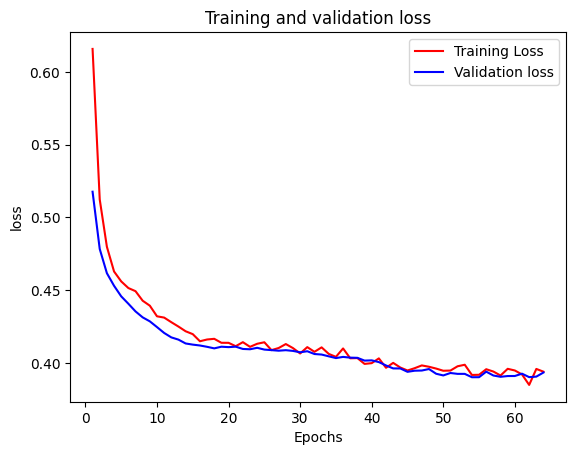

In [210]:
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

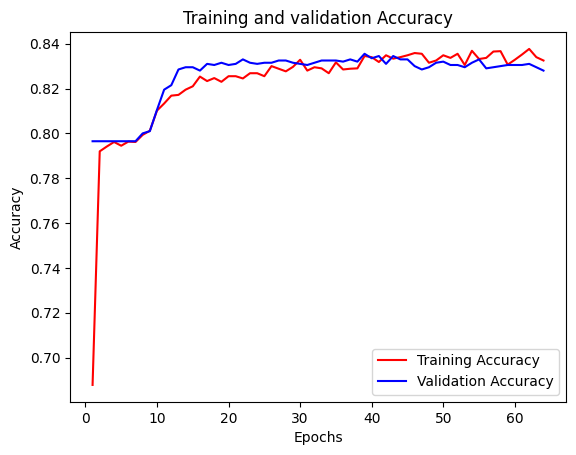

In [211]:
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Predictions

In [212]:
y_score= nn.predict(x_test)
y_score

63/63 [==============================] - 0s 2ms/step


array([[0.07069994],
       [0.1924236 ],
       [0.12283201],
       ...,
       [0.6287966 ],
       [0.09456725],
       [0.09614905]], dtype=float32)

## ROC Curve

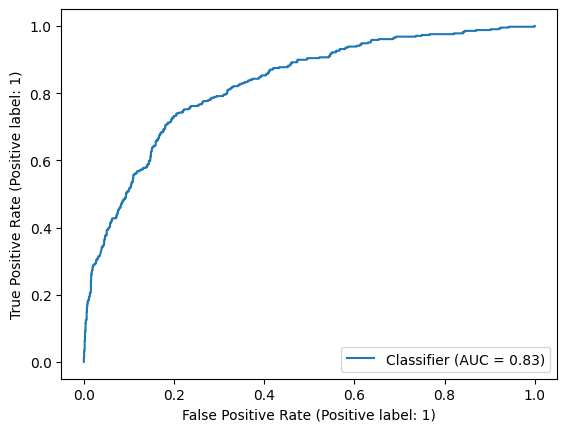

In [213]:
from sklearn.metrics import roc_curve,RocCurveDisplay
RocCurveDisplay.from_predictions(y_true=y_test,y_pred=y_score)

In [214]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_score)
nn_auc_score = roc_auc_score(y_true=y_test,y_score=y_score)
print(f'AUC -> {nn_auc_score}')

AUC -> 0.8276034123491751


### Youden's J Statistic for Threshold Determination
J = Sensitivity + Specificity – 1

J = Sensitivity + (1 – FalsePositiveRate) – 1

J = TruePositiveRate – FalsePositiveRate

Goal is to get - > Maximum TPR and Minimum FPR

In [215]:
idx = np.argmax(tpr - fpr) 
print(f" thrshold is {thresholds[idx]} and fpr is {fpr[idx]} and tpr is {tpr[idx]}")

 thrshold is 0.21050715446472168 and fpr is 0.20527306967984935 and tpr is 0.7395577395577395


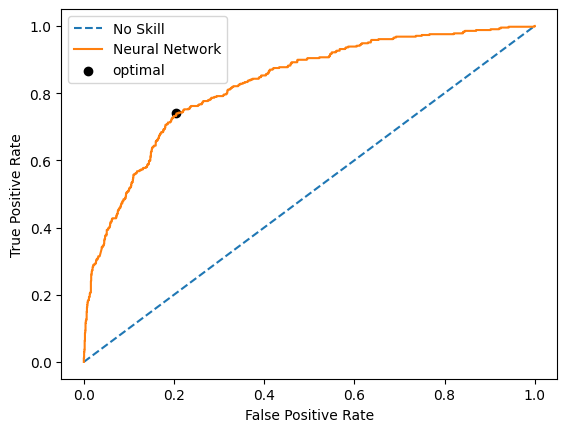

In [216]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Neural Network')
plt.scatter(fpr[idx], tpr[idx], marker='o', color='black', label='optimal')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

## Accuracy

In [217]:
from sklearn.metrics import accuracy_score

accuracies =[]
for i in thresholds:
    y_z =( y_score>i).astype(int)
    accuracies.append(accuracy_score(y_test,y_z))
print(accuracies)

[0.7965, 0.7965, 0.7985, 0.799, 0.8015, 0.802, 0.8025, 0.803, 0.8075, 0.808, 0.8115, 0.812, 0.8125, 0.813, 0.8165, 0.817, 0.8175, 0.8175, 0.8175, 0.818, 0.8215, 0.822, 0.8235, 0.824, 0.8245, 0.825, 0.8255, 0.826, 0.826, 0.826, 0.8255, 0.8255, 0.826, 0.8265, 0.826, 0.826, 0.827, 0.8275, 0.827, 0.8265, 0.8325, 0.833, 0.8355, 0.836, 0.836, 0.8365, 0.837, 0.8375, 0.837, 0.837, 0.838, 0.838, 0.838, 0.838, 0.8375, 0.8365, 0.836, 0.8355, 0.835, 0.8355, 0.8355, 0.836, 0.836, 0.835, 0.8345, 0.835, 0.8345, 0.8345, 0.8345, 0.833, 0.8325, 0.834, 0.833, 0.833, 0.832, 0.832, 0.8325, 0.8335, 0.834, 0.834, 0.834, 0.835, 0.8335, 0.8335, 0.834, 0.8355, 0.834, 0.834, 0.8335, 0.833, 0.8325, 0.8325, 0.833, 0.8335, 0.8335, 0.8335, 0.8325, 0.833, 0.833, 0.8325, 0.827, 0.8265, 0.827, 0.827, 0.8275, 0.827, 0.8275, 0.827, 0.827, 0.8265, 0.827, 0.8275, 0.8275, 0.827, 0.8275, 0.827, 0.827, 0.8265, 0.8265, 0.826, 0.8255, 0.8255, 0.826, 0.8255, 0.826, 0.826, 0.825, 0.825, 0.8255, 0.825, 0.8245, 0.8245, 0.823, 0.822

In [218]:
idx=np.argmax(accuracies)
print(f"optimal threshold is {thresholds[idx]}")

optimal threshold is 0.518820583820343


In [219]:
from sklearn.metrics import confusion_matrix
y_pred = ( y_score > thresholds[idx]).astype(int)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f'Accuracy -> {accuracy_score(y_test,y_pred)*100}%')

[[1562   31]
 [ 293  114]]
Accuracy -> 83.8%


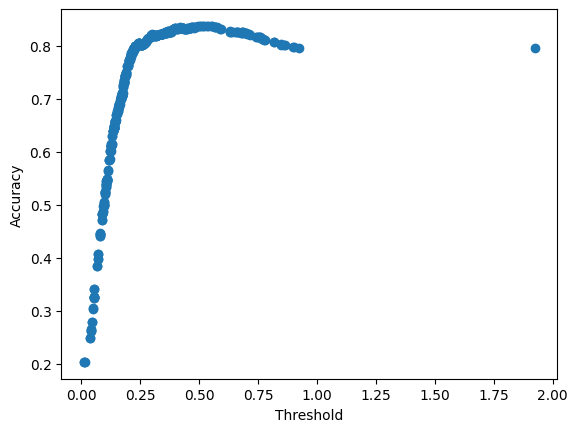

In [220]:
plt.scatter(thresholds,accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

### Choosing threshold is more of business problem, your desired goal.

## Single Prediction
#### use model to predict the specific person with some details<br>
    Geography: France
    Credit Score: 600
    Gender: Male
    Age: 40 years old
    Tenure: 3 years
    Balance: $60000
    Number of Products: 2
    Does this customer have a credit card ? Yes
    Is this customer an Active Member: Yes 
    Estimated Salary: $50000

In [221]:
'''
France code  is 0,0 after encoding and removing dummy varibale
'''
obs=np.array([0,0,1,700,40,3,0,2,1,1,50000]).reshape(1,11)
obs

array([[    0,     0,     1,   700,    40,     3,     0,     2,     1,
            1, 50000]])

In [222]:
new_pred = nn.predict(sc.transform(obs))
new_pred

1/1 [==============================] - 0s 55ms/step


array([[0.05981081]], dtype=float32)